In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the CSV
data = pd.read_csv("Student_Performance_Data.csv")

# Map Gender to numeric
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Drop any non-numeric or irrelevant columns (if any)
# Example: data = data.drop(columns=['Name'])

X = data.drop(columns=['Grade'])
y = data['Grade']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict grade for the first entry
predicted_grade = model.predict(X.iloc[[0]])[0]
print("Predicted Grade =", predicted_grade)


Predicted Grade = 70.06771014779963


In [7]:
!pip install scikit-learn


In [17]:
# New input data (example values)
new_data = pd.DataFrame([{
    'Age': 20,
    'Gender': 1,  # Female
    'StudyHours': 4,
    'SleepHours': 7,
    'Attendance': 85,
    'HomeworkDone': 1,
    'InternetUsage': 2,
    'PartTimeJob': 0,
    'ClassParticipation': 3,
    'HealthRating': 7,
    'ParentEducation': 2,
    'TravelTime': 1,
    'PastFailures': 0,
    'FamilySupport': 1,
    'ExtraActivities': 1
}])

# Predict
predicted_grade = model.predict(new_data)[0]
print("Predicted Grade for new data =", predicted_grade)




Predicted Grade for new data = 74.5887347360814


In [18]:
# Add predictions as a new column
data['PredictedGrade'] = model.predict(X)

# Display all student info with predicted grades
print(data)


    Age  Gender  StudyHours  SleepHours  Attendance  HomeworkDone  \
0    21       0           1           6          88             1   
1    25       0           2           6          62             1   
2    24       0           6           6          60             1   
3    19       0           2           8          72             0   
4    20       0           5           5         100             1   
..  ...     ...         ...         ...         ...           ...   
95   22       1           1           6          69             1   
96   19       1           2           7          77             0   
97   19       1           6           8          61             0   
98   18       1           3           5          73             1   
99   23       1           3           8          60             1   

    InternetUsage  PartTimeJob  ClassParticipation  HealthRating  \
0               1            1                   5             7   
1               2            0     

In [20]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model on training set only
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 368.9654606737944
R² Score: -0.4664181100663505


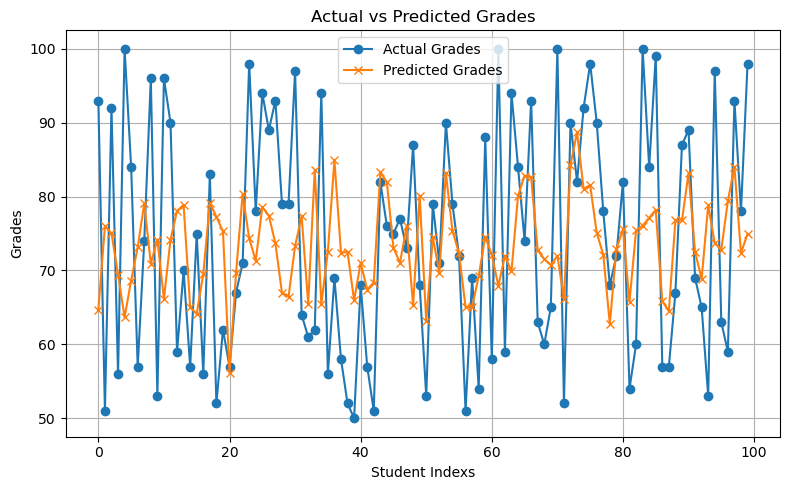

In [22]:
import matplotlib.pyplot as plt

predictions = model.predict(X)

plt.figure(figsize=(8,5))
plt.plot(y.values,label='Actual Grades',marker='o')
plt.plot(predictions,label='Predicted Grades',marker='x')
plt.title('Actual vs Predicted Grades')
plt.xlabel('Student Indexs')
plt.ylabel('Grades')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

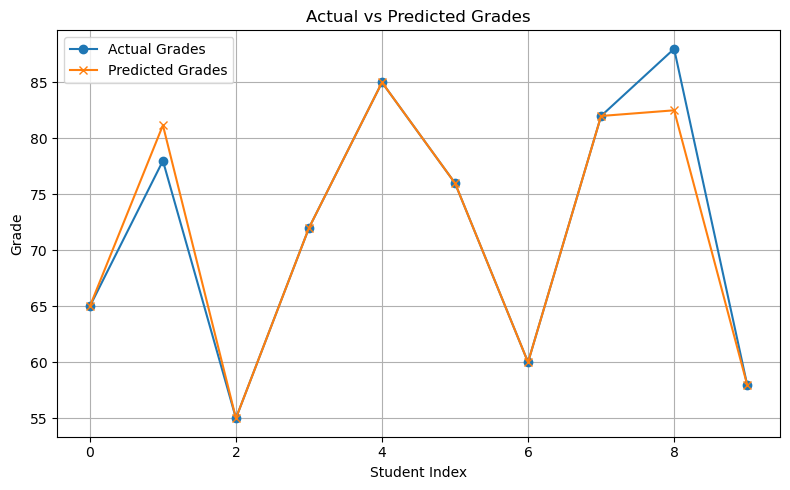

In [13]:
import matplotlib.pyplot as plt

# Predict on all data
predictions = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.plot(y.values, label='Actual Grades', marker='o')
plt.plot(predictions, label='Predicted Grades', marker='x')
plt.title('Actual vs Predicted Grades')
plt.xlabel('Student Index')
plt.ylabel('Grade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(model, '1st_ML_model linear Regression.pkl')  # Save your trained model

NameError: name 'model' is not defined